In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import optimizers

Here we are going to carry out train and validation split.
There are 6 classes, hence we are creating 6 different folder and rnadomly seprate the images where 80% to the training folder and 20% to the testing folder.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset')
print(data_dir_list)
path, dirs, files = next(os.walk('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset'))
file_count = len(files)

['trash', 'plastic', 'metal', 'paper', 'cardboard', 'glass']


In [ ]:
# make new base directory
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset'
base_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/'

In [ ]:
# create train and test folder
train_dir = os.path.join(base_dir,'TRAIN')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'VALIDATION')
os.mkdir(validation_dir)

In [ ]:
# create classes folder
train_plastic_dir = os.path.join(train_dir, 'plastic')
os.mkdir(train_plastic_dir)

train_trash_dir = os.path.join(train_dir, 'trash')
os.mkdir(train_trash_dir)

train_cardboard_dir = os.path.join(train_dir, 'cardboard')
os.mkdir(train_cardboard_dir)

train_glass_dir = os.path.join(train_dir, 'glass')
os.mkdir(train_glass_dir)

train_metal_dir = os.path.join(train_dir, 'metal')
os.mkdir(train_metal_dir)

train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

In [ ]:
validation_plastic_dir = os.path.join(validation_dir, 'plastic')
os.mkdir(validation_plastic_dir)

validation_trash_dir = os.path.join(validation_dir, 'trash')
os.mkdir(validation_trash_dir)

validation_cardboard_dir = os.path.join(validation_dir, 'cardboard')
os.mkdir(validation_cardboard_dir)

validation_glass_dir = os.path.join(validation_dir, 'glass')
os.mkdir(validation_glass_dir)

validation_metal_dir = os.path.join(validation_dir, 'metal')
os.mkdir(validation_metal_dir)

validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
# ['plastic', 'trash', 'cardboard', 'glass', 'metal', 'paper']
# here we specifice all the directory of the folders

plastic_source_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset/plastic/'
training_plastic_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/plastic/'
valid_plastic_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/plastic/'

trash_source_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset/trash/'
training_trash_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/trash/'
valid_trash_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/trash/'

cardboard_source_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset/cardboard/'
training_cardboard_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/cardboard/'
valid_cardboard_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/cardboard/'

glass_source_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset/glass/'
training_glass_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/glass/'
valid_glass_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/glass/'

metal_source_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset/metal/'
training_metal_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/metal/'
valid_metal_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/metal/'

paper_source_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Dataset/paper/'
training_paper_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/paper/'
valid_paper_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/paper/'

In [ ]:
# here we separate into 80:20 ratio
import os
import random
from shutil import copyfile

split_size = .80

split_data(plastic_source_dir, training_plastic_dir, valid_plastic_dir, split_size)
split_data(trash_source_dir, training_trash_dir, valid_trash_dir, split_size)
split_data(cardboard_source_dir, training_cardboard_dir, valid_cardboard_dir, split_size)
split_data(glass_source_dir, training_glass_dir, valid_glass_dir, split_size)
split_data(metal_source_dir, training_metal_dir, valid_metal_dir, split_size)
split_data(paper_source_dir, training_paper_dir, valid_paper_dir, split_size)

After splitting the dataset, we will going to check and verfified the images is existed in both training and validation folder.

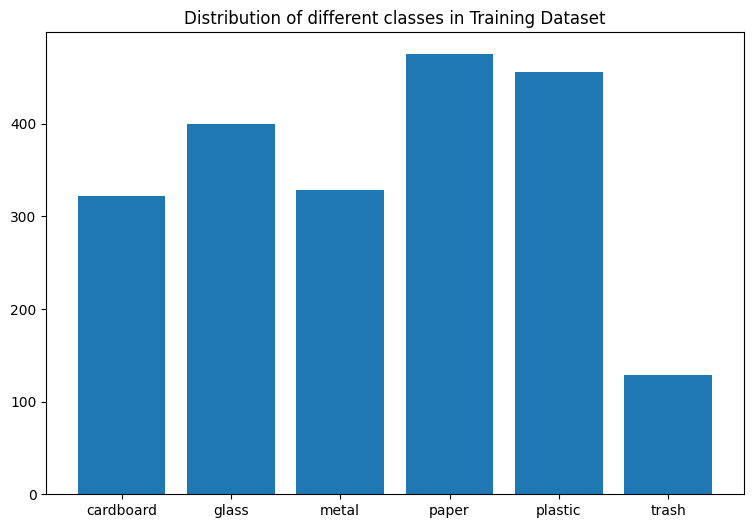

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/'+i+'/'))))

Training cardboard images are: 322
Training glass images are: 400
Training metal images are: 328
Training paper images are: 475
Training plastic images are: 456
Training trash images are: 129


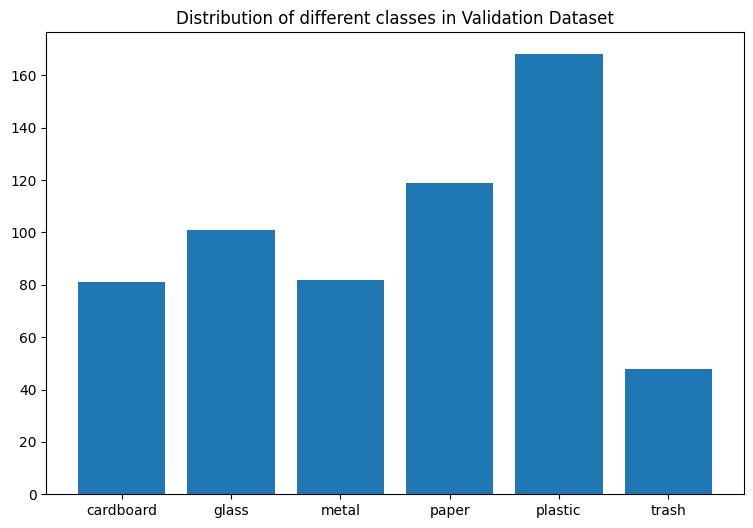

In [ ]:
image_folder = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/'+i+'/'))))

Validation cardboard images are: 81
Validation glass images are: 101
Validation metal images are: 82
Validation paper images are: 119
Validation plastic images are: 168
Validation trash images are: 48


# Data Preprocessing
We will carry out data augmentation including image resize (256*256)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=30

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TRAIN/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 2110 images belonging to 6 classes.


In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/VALIDATION/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 599 images belonging to 6 classes.


In [ ]:
print(train_generator.class_indices)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# Exploratory Data Analysis
Here we need to explore the images contain in the training, validation and testing folder. There are 20 images will be shown in the grid 5*4

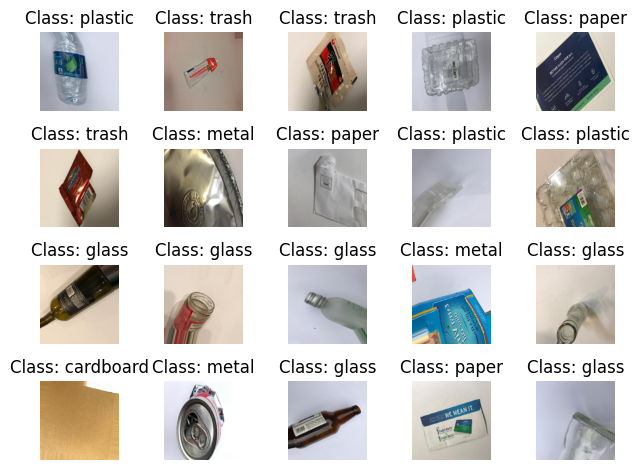

In [ ]:
# Visualize training set
import matplotlib.pyplot as plt
import numpy as np

num_images = 20

num_rows = 4
num_cols = 5

class_labels = list(train_generator.class_indices.keys())

# Get the first batch of images and labels
for i in range(num_images // train_generator.batch_size + 1):
    batch, labels = train_generator.next()

    for j in range(batch.shape[0]):
        plt.subplot(num_rows, num_cols, j + 1)
        plt.imshow(batch[j])
        plt.title(f'Class: {class_labels[np.argmax(labels[j])]}')
        plt.axis('off')

        num_images -= 1

        # Check if displayed enough images
        if num_images == 0:
            break

    # Break the outer loop if displayed enough images
    if num_images == 0:
        break

plt.tight_layout()
plt.show()


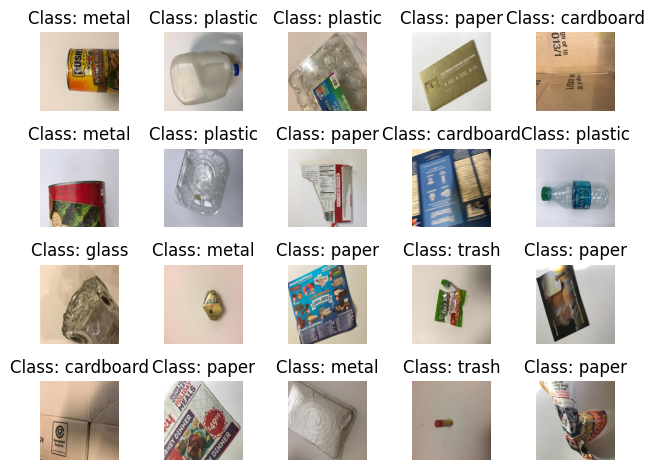

In [ ]:
# Visualize validation set
import matplotlib.pyplot as plt
import numpy as np

num_images = 20

num_rows = 4
num_cols = 5

class_labels = list(validation_generator.class_indices.keys())

# Get the first batch of images and labels
for i in range(num_images // validation_generator.batch_size + 1):
    batch, labels = validation_generator.next()

    for j in range(batch.shape[0]):
        plt.subplot(num_rows, num_cols, j + 1)
        plt.imshow(batch[j])
        plt.title(f'Class: {class_labels[np.argmax(labels[j])]}')
        plt.axis('off')

        num_images -= 1

        # Check if displayed enough images
        if num_images == 0:
            break

    # Break the outer loop if displayed enough images
    if num_images == 0:
        break

# Adjust layout to prevent overlapping of titles
plt.tight_layout()
plt.show()


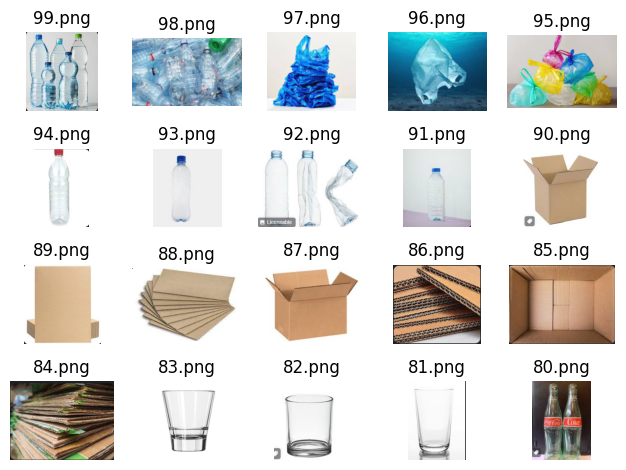

In [ ]:
# Visualize testing set
folder_path = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TESTING'

files = os.listdir(folder_path)

# Number of rows and columns for the grid layout
num_rows = 4
num_cols = 5

# Display 20 images with their names in a grid layout
num_images = num_rows * num_cols
for i, file_name in enumerate(files[:num_images]):
    file_path = os.path.join(folder_path, file_name)

    # Read and display the image
    img = plt.imread(file_path)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.title(f'{file_name}')
    plt.axis('off')

# Adjust layout to prevent overlapping of titles
plt.tight_layout()
plt.show()


# Baseline CNN Model
Here we are going to start building CNN models.
First model build is a baseline model, use as a comparison with transfer learning.

In [ ]:
from tensorflow import keras
keras.backend.clear_session()

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_height, img_width, 3)))
# 1st layer - 32 kernel, each kernel (3x3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))


In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model.fit(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator
                              )

Epoch 1/20
71/71 [==============================] - 60s 826ms/step - loss: 1.7151 - accuracy: 0.2498 - val_loss: 1.6488 - val_accuracy: 0.3489
Epoch 2/20
71/71 [==============================] - 42s 591ms/step - loss: 1.6471 - accuracy: 0.3137 - val_loss: 1.6035 - val_accuracy: 0.2554
Epoch 3/20
71/71 [==============================] - 43s 613ms/step - loss: 1.6033 - accuracy: 0.3521 - val_loss: 1.5459 - val_accuracy: 0.4140
Epoch 4/20
71/71 [==============================] - 42s 589ms/step - loss: 1.5294 - accuracy: 0.3844 - val_loss: 1.4292 - val_accuracy: 0.4391
Epoch 5/20
71/71 [==============================] - 43s 607ms/step - loss: 1.4805 - accuracy: 0.4043 - val_loss: 1.4069 - val_accuracy: 0.4658
Epoch 6/20
71/71 [==============================] - 42s 595ms/step - loss: 1.4575 - accuracy: 0.4185 - val_loss: 1.3704 - val_accuracy: 0.4624
Epoch 7/20
71/71 [==============================] - 42s 596ms/step - loss: 1.3970 - accuracy: 0.4336 - val_loss: 1.3903 - val_accuracy: 0.4691

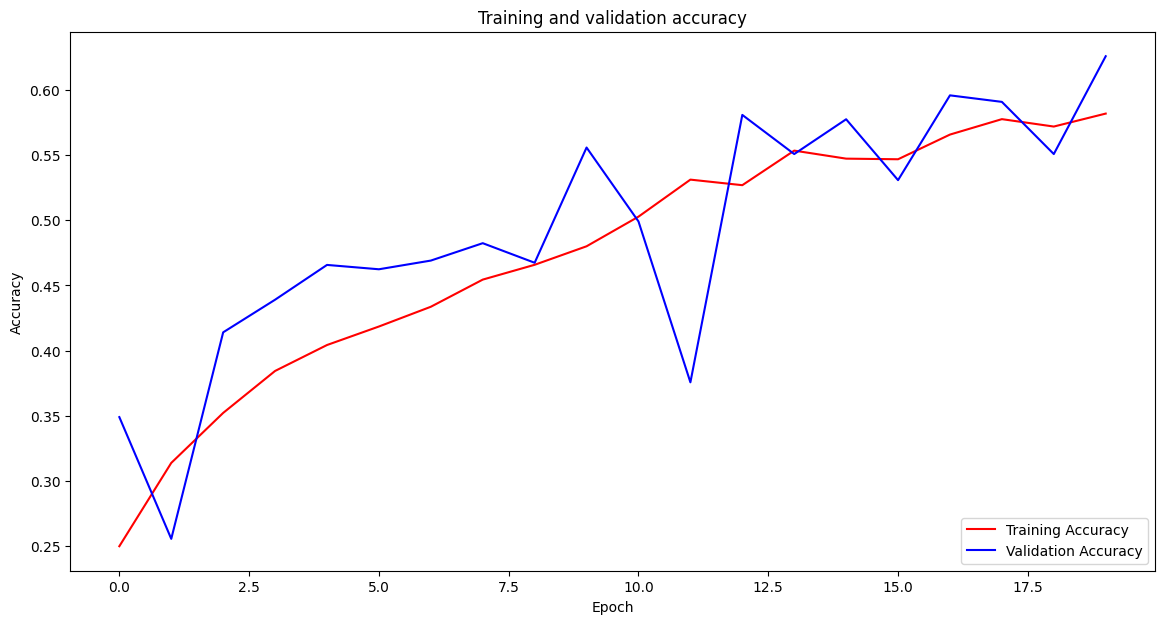

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

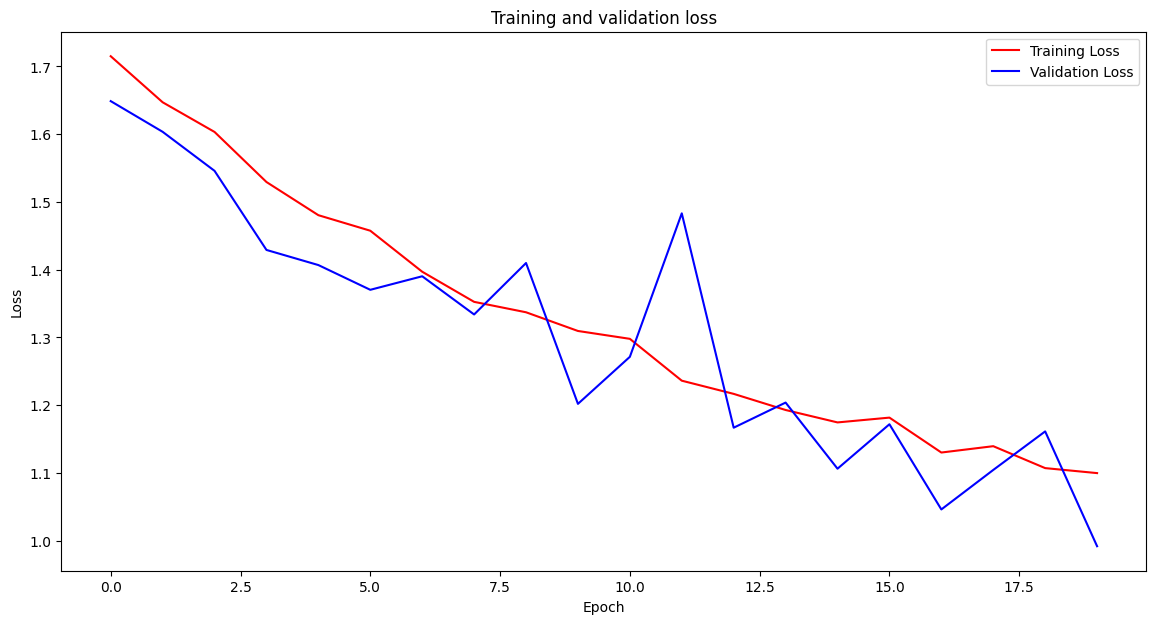

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# Adding epoch (20 -> 30)

In [ ]:
keras.backend.clear_session()

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator
                              )

Epoch 1/30
71/71 [==============================] - 46s 619ms/step - loss: 1.7019 - accuracy: 0.2583 - val_loss: 1.6452 - val_accuracy: 0.3372
Epoch 2/30
71/71 [==============================] - 42s 586ms/step - loss: 1.6378 - accuracy: 0.3209 - val_loss: 1.5500 - val_accuracy: 0.4124
Epoch 3/30
71/71 [==============================] - 41s 584ms/step - loss: 1.5664 - accuracy: 0.3531 - val_loss: 1.5142 - val_accuracy: 0.4057
Epoch 4/30
71/71 [==============================] - 41s 584ms/step - loss: 1.5862 - accuracy: 0.3531 - val_loss: 1.5971 - val_accuracy: 0.3038
Epoch 5/30
71/71 [==============================] - 41s 583ms/step - loss: 1.4896 - accuracy: 0.3957 - val_loss: 1.4248 - val_accuracy: 0.4073
Epoch 6/30
71/71 [==============================] - 41s 581ms/step - loss: 1.4435 - accuracy: 0.4175 - val_loss: 1.3511 - val_accuracy: 0.4891
Epoch 7/30
71/71 [==============================] - 41s 585ms/step - loss: 1.4156 - accuracy: 0.4332 - val_loss: 1.3306 - val_accuracy: 0.4708

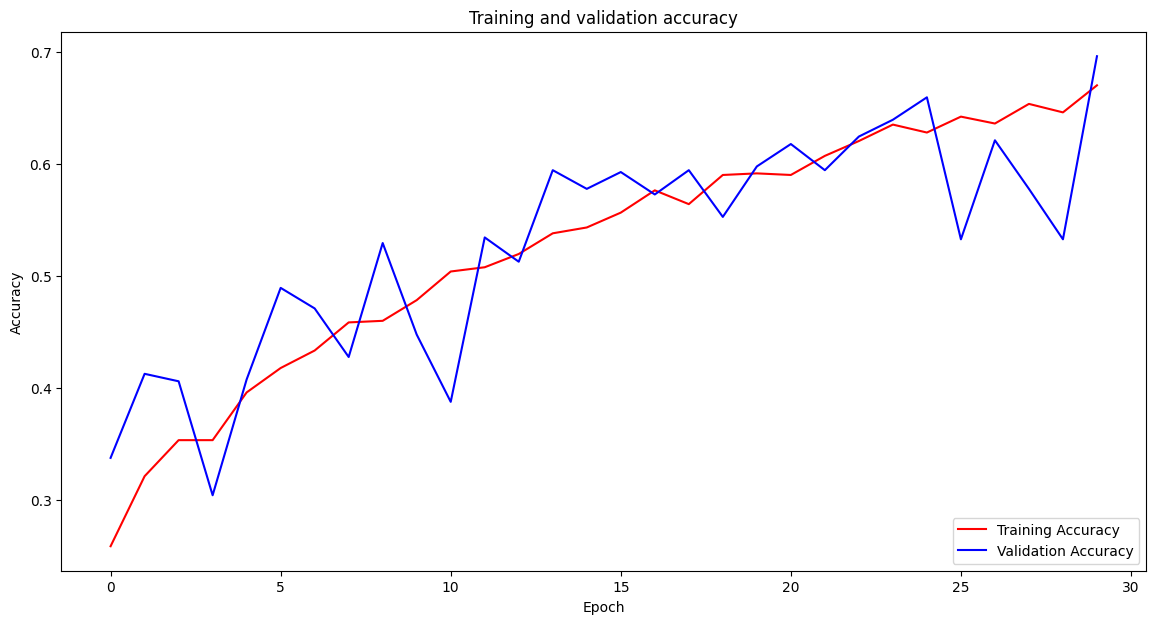

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

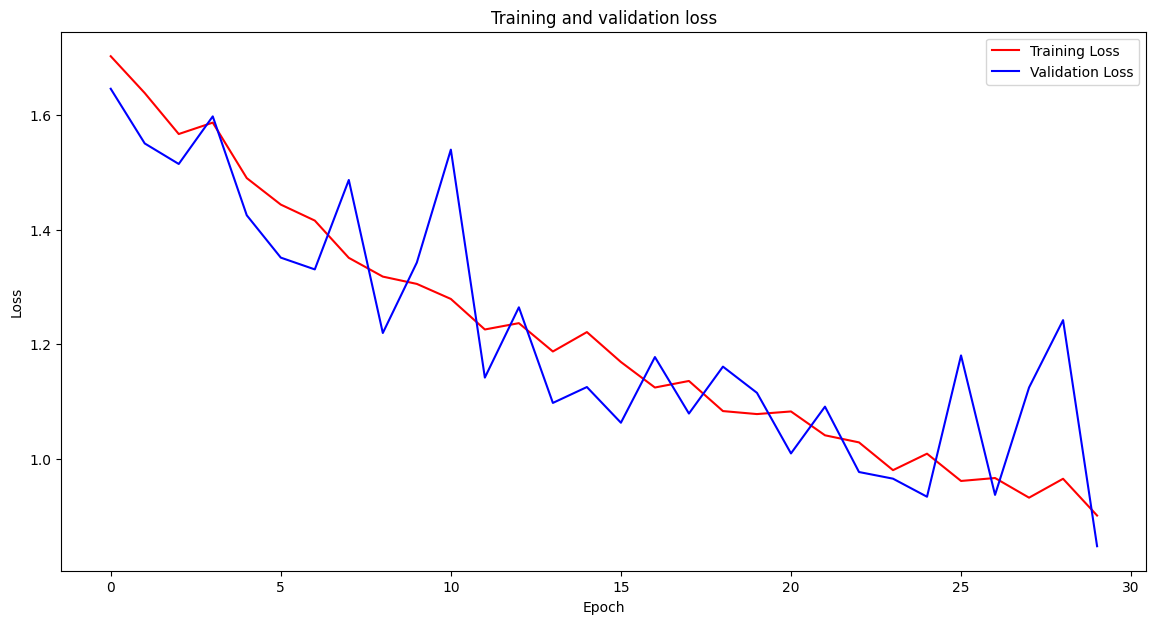

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# Change Optimzers (SGD to Adam)

In [ ]:
keras.backend.clear_session()

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator
                              )

Epoch 1/30
71/71 [==============================] - 46s 613ms/step - loss: 2.1756 - accuracy: 0.3351 - val_loss: 1.4190 - val_accuracy: 0.4758
Epoch 2/30
71/71 [==============================] - 43s 602ms/step - loss: 1.3199 - accuracy: 0.4716 - val_loss: 1.1995 - val_accuracy: 0.5058
Epoch 3/30
71/71 [==============================] - 42s 590ms/step - loss: 1.1867 - accuracy: 0.5336 - val_loss: 1.1548 - val_accuracy: 0.5376
Epoch 4/30
71/71 [==============================] - 41s 582ms/step - loss: 1.1400 - accuracy: 0.5607 - val_loss: 1.1402 - val_accuracy: 0.5760
Epoch 5/30
71/71 [==============================] - 40s 565ms/step - loss: 1.0363 - accuracy: 0.6114 - val_loss: 1.1446 - val_accuracy: 0.5743
Epoch 6/30
71/71 [==============================] - 41s 572ms/step - loss: 1.0236 - accuracy: 0.6123 - val_loss: 1.4605 - val_accuracy: 0.4624
Epoch 7/30
71/71 [==============================] - 40s 564ms/step - loss: 1.0046 - accuracy: 0.6175 - val_loss: 1.0593 - val_accuracy: 0.6260

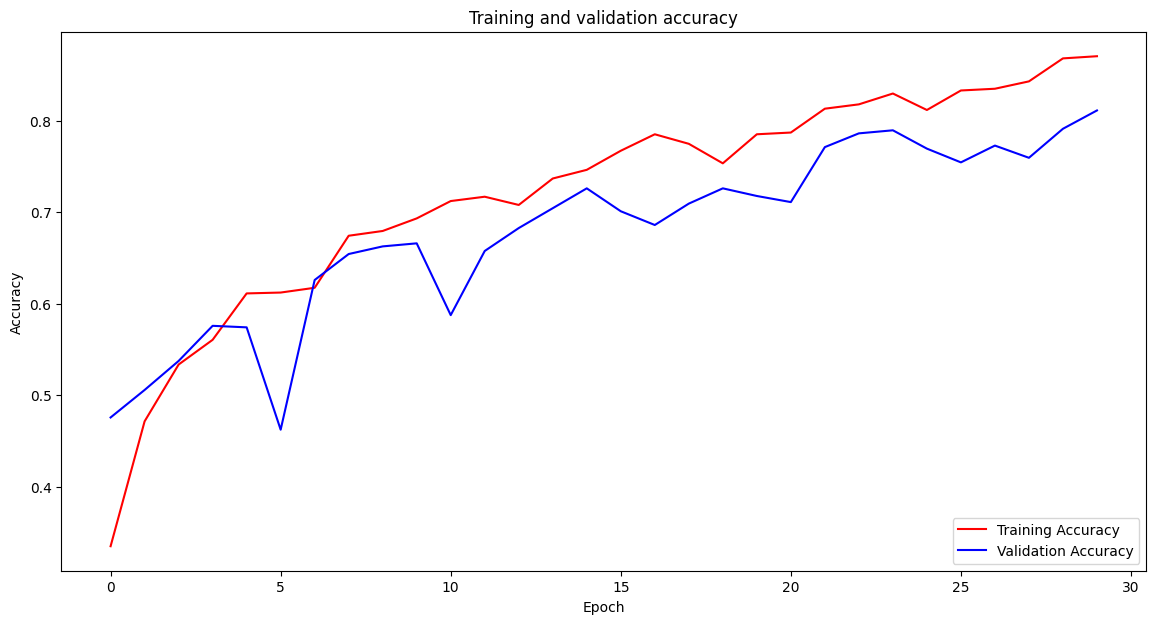

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

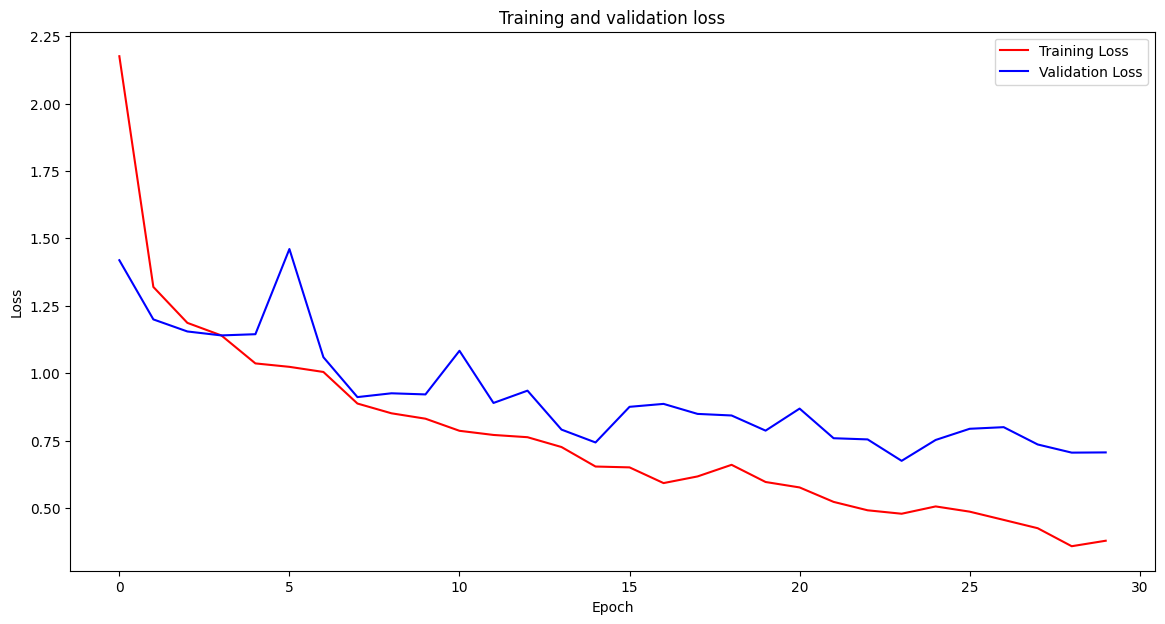

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# Adding more Layers

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator
                              )

Epoch 1/30
71/71 [==============================] - 528s 7s/step - loss: 1.7284 - accuracy: 0.2673 - val_loss: 1.4754 - val_accuracy: 0.4424
Epoch 2/30
71/71 [==============================] - 42s 596ms/step - loss: 1.4112 - accuracy: 0.4237 - val_loss: 1.3903 - val_accuracy: 0.4608
Epoch 3/30
71/71 [==============================] - 42s 594ms/step - loss: 1.3105 - accuracy: 0.4763 - val_loss: 1.1457 - val_accuracy: 0.5359
Epoch 4/30
71/71 [==============================] - 42s 596ms/step - loss: 1.2444 - accuracy: 0.5128 - val_loss: 1.1466 - val_accuracy: 0.5760
Epoch 5/30
71/71 [==============================] - 43s 599ms/step - loss: 1.1571 - accuracy: 0.5379 - val_loss: 1.1210 - val_accuracy: 0.5559
Epoch 6/30
71/71 [==============================] - 42s 593ms/step - loss: 1.0818 - accuracy: 0.5829 - val_loss: 1.2813 - val_accuracy: 0.5392
Epoch 7/30
71/71 [==============================] - 42s 591ms/step - loss: 1.0356 - accuracy: 0.6043 - val_loss: 0.9987 - val_accuracy: 0.6144
E

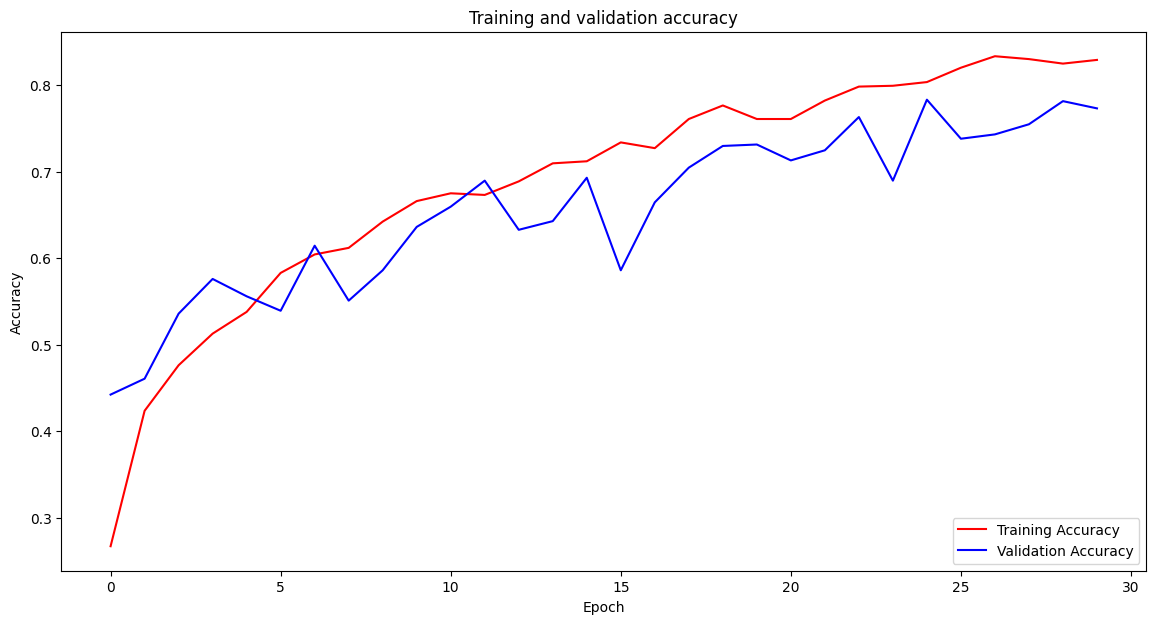

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

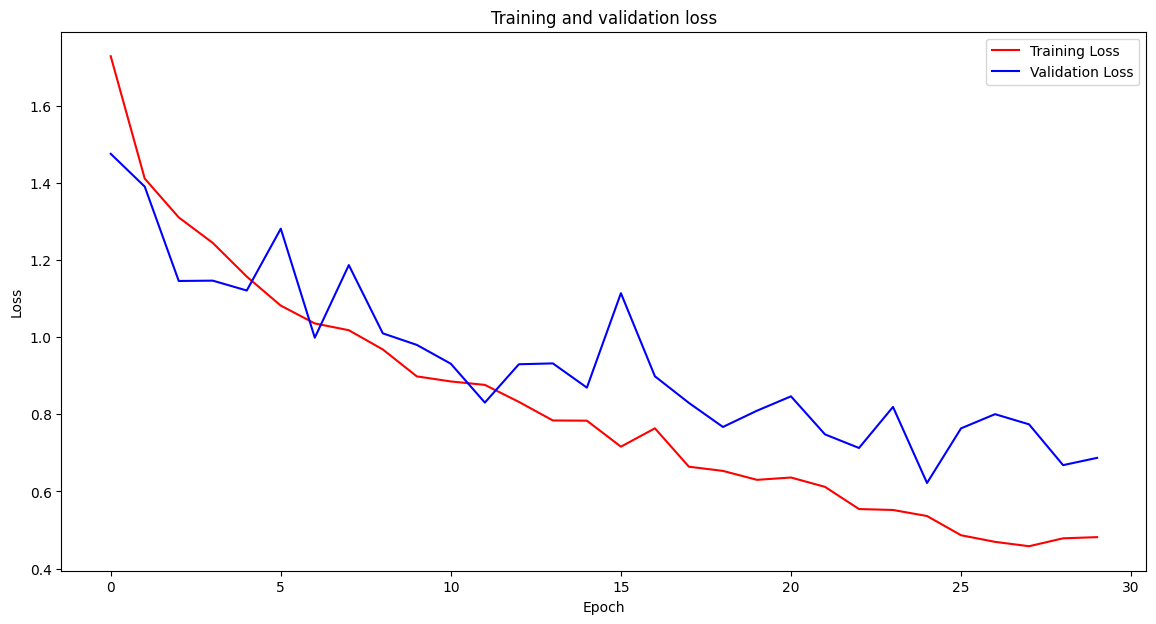

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
test_score = model.evaluate(validation_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

20/20 [==============================] - 3s 135ms/step - loss: 0.6872 - accuracy: 0.7730
[INFO] accuracy: 77.30%
[INFO] Loss:  0.687153697013855


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Hyperparameter Tuning & Regularization
Here we are using dropout as regularization

In [ ]:
from tensorflow import keras
keras.backend.clear_session()

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/CNN_optimized.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
from keras import layers
from keras import models
from keras.regularizers import l2
from keras.layers import Dropout, BatchNormalization


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(Dropout(0.5, name='dropout1'))
model.add(layers.Dense(512, activation='relu'))

model.add(Dropout(0.5, name='dropout2'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator
                              )

Epoch 1/30
71/71 [==============================] - 44s 579ms/step - loss: 1.7628 - accuracy: 0.2265 - val_loss: 1.6786 - val_accuracy: 0.2621
Epoch 2/30
71/71 [==============================] - 50s 706ms/step - loss: 1.6181 - accuracy: 0.3161 - val_loss: 1.4390 - val_accuracy: 0.4558
Epoch 3/30
71/71 [==============================] - 45s 628ms/step - loss: 1.4420 - accuracy: 0.3948 - val_loss: 1.2960 - val_accuracy: 0.5342
Epoch 4/30
71/71 [==============================] - 42s 594ms/step - loss: 1.3110 - accuracy: 0.4877 - val_loss: 1.1707 - val_accuracy: 0.5526
Epoch 5/30
71/71 [==============================] - 41s 579ms/step - loss: 1.2536 - accuracy: 0.5133 - val_loss: 1.2401 - val_accuracy: 0.5142
Epoch 6/30
71/71 [==============================] - 42s 588ms/step - loss: 1.1768 - accuracy: 0.5474 - val_loss: 1.1996 - val_accuracy: 0.5576
Epoch 7/30
71/71 [==============================] - 41s 580ms/step - loss: 1.1344 - accuracy: 0.5791 - val_loss: 1.1948 - val_accuracy: 0.5626

In [ ]:
test_score = model.evaluate(validation_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

20/20 [==============================] - 2s 103ms/step - loss: 0.7513 - accuracy: 0.7412
[INFO] accuracy: 74.12%
[INFO] Loss:  0.7512659430503845


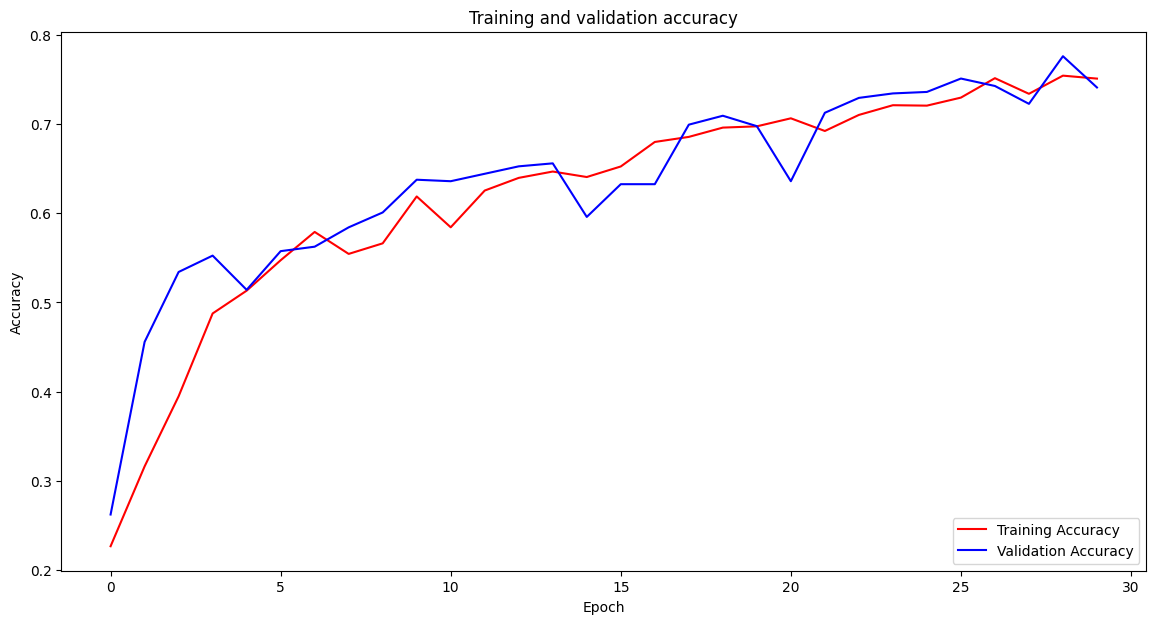

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

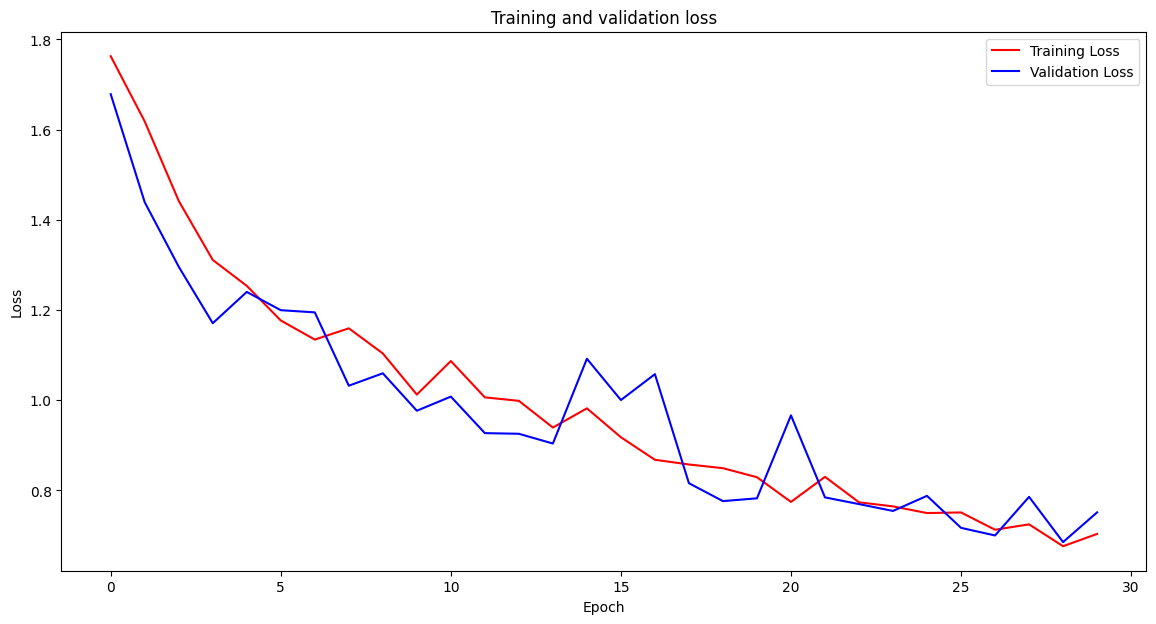

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/CNN_optimized.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# VGG16
Here we are going to build a base VGG16

reference : https://medium.com/analytics-vidhya/multi-class-image-classification-using-transfer-learning-with-deep-convolutional-neural-networks-eab051cde3fb

In [ ]:
keras.backend.clear_session()

In [ ]:
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import  plot_model
from keras import optimizers

In [ ]:
vgg16_model = VGG16(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),
              pooling='avg')

In [ ]:
for layers in vgg16_model.layers:
            layers.trainable=False

In [ ]:
import keras

last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(6, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)

vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

vgg16_final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgg16_history = vgg16_final_model.fit(train_generator, epochs = 30 ,validation_data = validation_generator, verbose=1)

Epoch 1/30
71/71 [==============================] - 46s 621ms/step - loss: 1.5413 - acc: 0.3649 - val_loss: 1.3624 - val_acc: 0.4658
Epoch 2/30
71/71 [==============================] - 44s 614ms/step - loss: 1.2845 - acc: 0.4853 - val_loss: 1.1954 - val_acc: 0.5326
Epoch 3/30
71/71 [==============================] - 46s 645ms/step - loss: 1.1621 - acc: 0.5498 - val_loss: 1.1005 - val_acc: 0.5993
Epoch 4/30
71/71 [==============================] - 44s 615ms/step - loss: 1.0704 - acc: 0.5929 - val_loss: 1.0633 - val_acc: 0.5876
Epoch 5/30
71/71 [==============================] - 44s 622ms/step - loss: 1.0103 - acc: 0.6299 - val_loss: 0.9799 - val_acc: 0.6194
Epoch 6/30
71/71 [==============================] - 43s 600ms/step - loss: 0.9847 - acc: 0.6346 - val_loss: 0.9129 - val_acc: 0.6711
Epoch 7/30
71/71 [==============================] - 45s 634ms/step - loss: 0.9225 - acc: 0.6701 - val_loss: 0.8817 - val_acc: 0.6678
Epoch 8/30
71/71 [==============================] - 44s 625ms/step - 

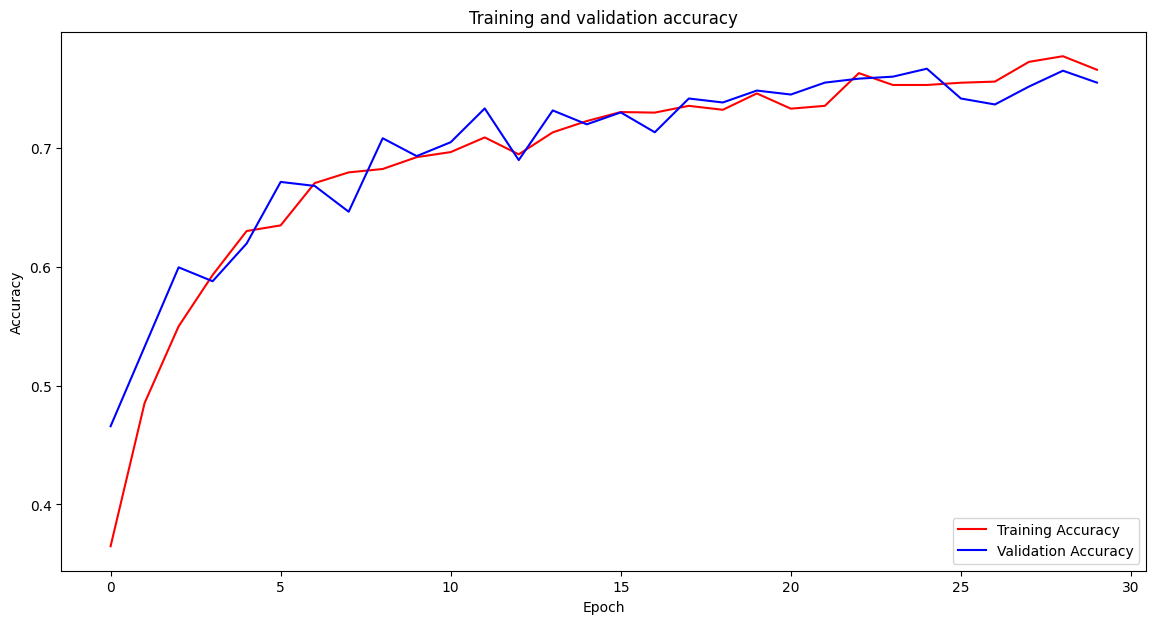

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=vgg16_history.history['acc']
val_acc=vgg16_history.history['val_acc']
loss=vgg16_history.history['loss']
val_loss=vgg16_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

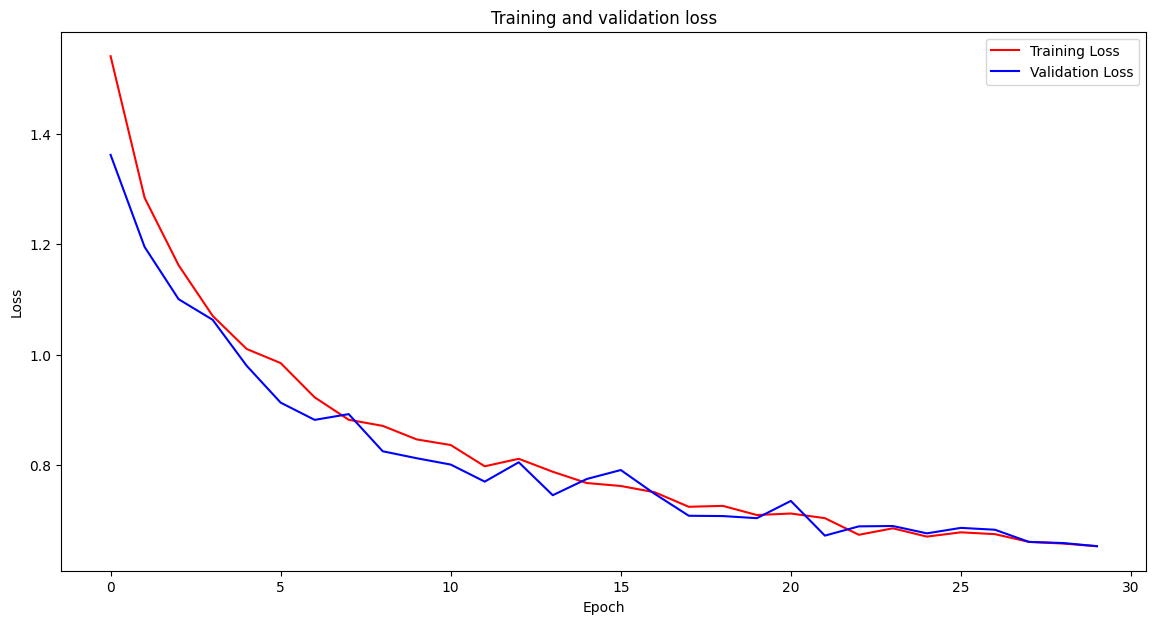

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
test_score = vgg16_final_model.evaluate(validation_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

20/20 [==============================] - 5s 240ms/step - loss: 0.6525 - acc: 0.7546
[INFO] accuracy: 75.46%
[INFO] Loss:  0.6525226831436157


# VGG16 Fine Tuning
In this section, we will going to unfreeze some layer in VGG16

In [ ]:
vgg16_model.trainable = True

set_trainable = False
for layer in vgg16_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in vgg16_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
import keras

last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(6, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)

vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

vgg16_final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgg16_history = vgg16_final_model.fit(train_generator, epochs = 30 ,validation_data = validation_generator, verbose=1)

Epoch 1/30
71/71 [==============================] - 62s 805ms/step - loss: 1.8492 - acc: 0.2194 - val_loss: 1.6859 - val_acc: 0.2805
Epoch 2/30
71/71 [==============================] - 46s 649ms/step - loss: 1.6391 - acc: 0.3109 - val_loss: 1.6569 - val_acc: 0.3406
Epoch 3/30
71/71 [==============================] - 47s 655ms/step - loss: 1.5990 - acc: 0.3322 - val_loss: 1.6035 - val_acc: 0.3539
Epoch 4/30
71/71 [==============================] - 46s 653ms/step - loss: 1.4445 - acc: 0.3896 - val_loss: 1.3051 - val_acc: 0.4858
Epoch 5/30
71/71 [==============================] - 46s 640ms/step - loss: 1.2929 - acc: 0.4569 - val_loss: 1.2714 - val_acc: 0.4441
Epoch 6/30
71/71 [==============================] - 46s 637ms/step - loss: 1.2087 - acc: 0.5185 - val_loss: 1.3420 - val_acc: 0.4775
Epoch 7/30
71/71 [==============================] - 46s 644ms/step - loss: 1.1348 - acc: 0.5507 - val_loss: 1.1888 - val_acc: 0.5209
Epoch 8/30
71/71 [==============================] - 46s 646ms/step - 

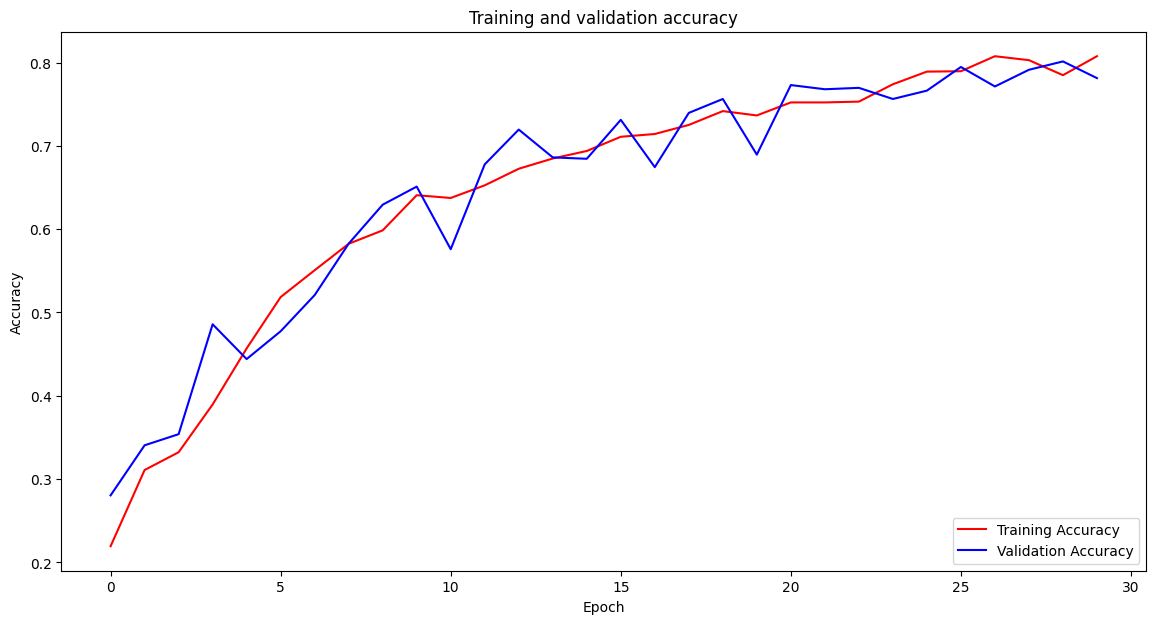

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=vgg16_history.history['acc']
val_acc=vgg16_history.history['val_acc']
loss=vgg16_history.history['loss']
val_loss=vgg16_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

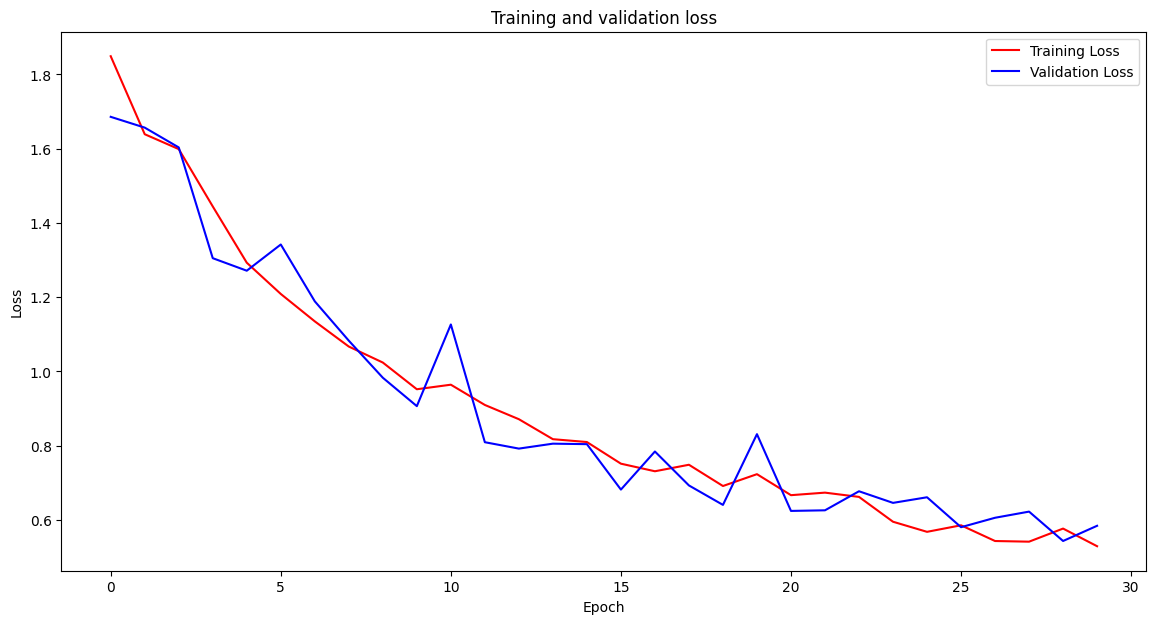

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# VGG16 Regularization
In this secton, we are choosing dropout and early stopping as regularization

In [ ]:
keras.backend.clear_session()

In [ ]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))

for layers in vgg16_model.layers:
            layers.trainable=False

In [ ]:
vgg16_model.trainable = True

set_trainable = False
for layer in vgg16_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
import keras
from tensorflow.keras.models import Model

last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dropout(0.5)(vgg_x)
vgg_x = Dense(6, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)

vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

vgg16_filepath = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/VGG16_optimized.h5'
vgg_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
vgg_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
vgg16_history = vgg16_final_model.fit(train_generator, epochs = 30 ,validation_data = validation_generator,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)


Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 1.6967 - acc: 0.2953
Epoch 1: val_acc improved from -inf to 0.42905, saving model to /content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/VGG16_optimized.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - 51s 696ms/step - loss: 1.6967 - acc: 0.2953 - val_loss: 1.4812 - val_acc: 0.4290
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 1.4323 - acc: 0.4175
Epoch 2: val_acc improved from 0.42905 to 0.48748, saving model to /content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/VGG16_optimized.h5
71/71 [==============================] - 47s 665ms/step - loss: 1.4323 - acc: 0.4175 - val_loss: 1.3055 - val_acc: 0.4875
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.3310 - acc: 0.4621
Epoch 3: val_acc improved from 0.48748 to 0.51586, saving model to /content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/VGG16_optimized.h5
71/71 [==============================] - 48s 670ms/step - loss: 1.3310 - acc: 0.4621 - val_loss: 1.2178 - val_acc: 0.5159
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.2282 - acc: 0.5123
Epoch 4: val_acc improved from 0.51586 to 0.584

In [ ]:
test_score = vgg16_final_model.evaluate(validation_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

20/20 [==============================] - 3s 160ms/step - loss: 0.7161 - acc: 0.7429
[INFO] accuracy: 74.29%
[INFO] Loss:  0.7161300182342529


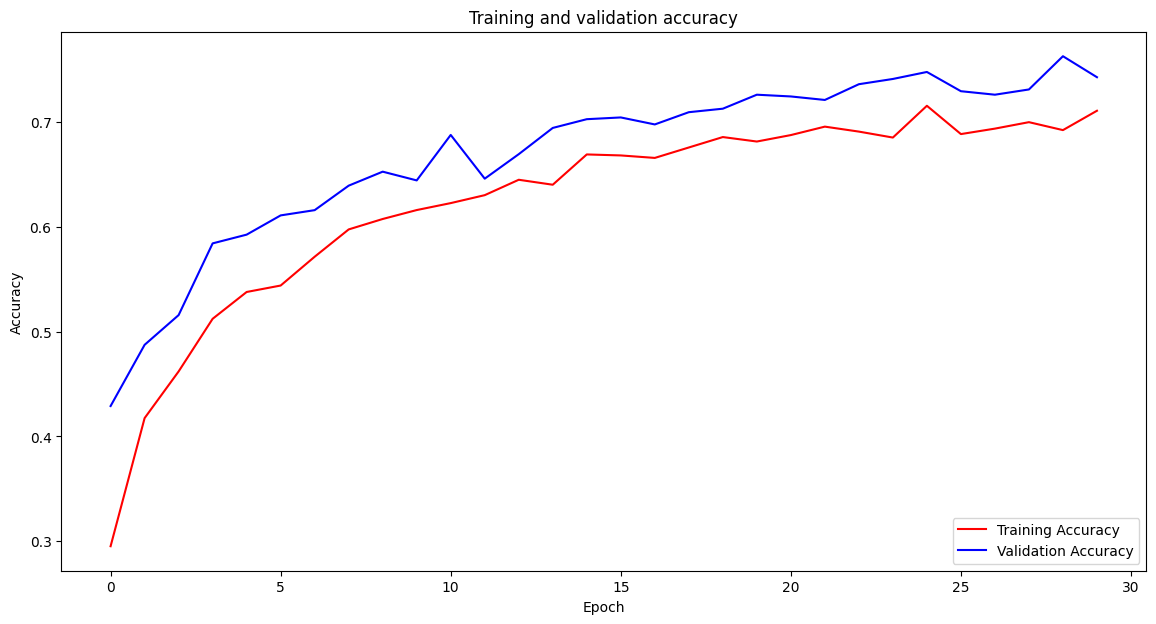

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc=vgg16_history.history['acc']
val_acc=vgg16_history.history['val_acc']
loss=vgg16_history.history['loss']
val_loss=vgg16_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

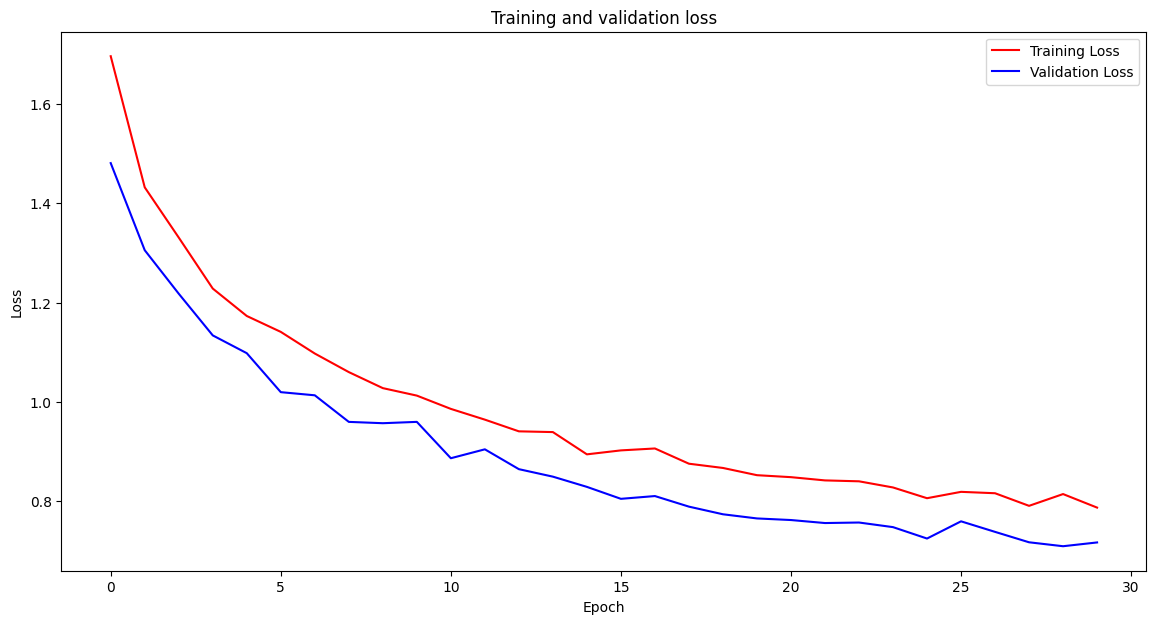

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# InceptionV3
Here we are going to build a base InceptionV3 model

In [ ]:
keras.backend.clear_session()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

InceptionV3_model = InceptionV3(input_shape=(img_height,img_width,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers:
   layer.trainable = False


87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.models import Model

InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)

InceptionV3_x = Dense(6, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
InceptionV3_x_final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [ ]:
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = 30, validation_data = validation_generator, verbose=1)

Epoch 1/30
71/71 [==============================] - 48s 589ms/step - loss: 11.0887 - accuracy: 0.5810 - val_loss: 0.8315 - val_accuracy: 0.7713
Epoch 2/30
71/71 [==============================] - 41s 579ms/step - loss: 0.6378 - accuracy: 0.7877 - val_loss: 0.5892 - val_accuracy: 0.8114
Epoch 3/30
71/71 [==============================] - 40s 565ms/step - loss: 0.5289 - accuracy: 0.8052 - val_loss: 0.5120 - val_accuracy: 0.8147
Epoch 4/30
71/71 [==============================] - 41s 565ms/step - loss: 0.5038 - accuracy: 0.8299 - val_loss: 0.5603 - val_accuracy: 0.8097
Epoch 5/30
71/71 [==============================] - 41s 568ms/step - loss: 0.4147 - accuracy: 0.8555 - val_loss: 0.5599 - val_accuracy: 0.8347
Epoch 6/30
71/71 [==============================] - 42s 581ms/step - loss: 0.3841 - accuracy: 0.8659 - val_loss: 0.5071 - val_accuracy: 0.8314
Epoch 7/30
71/71 [==============================] - 42s 595ms/step - loss: 0.3056 - accuracy: 0.8924 - val_loss: 0.3977 - val_accuracy: 0.876

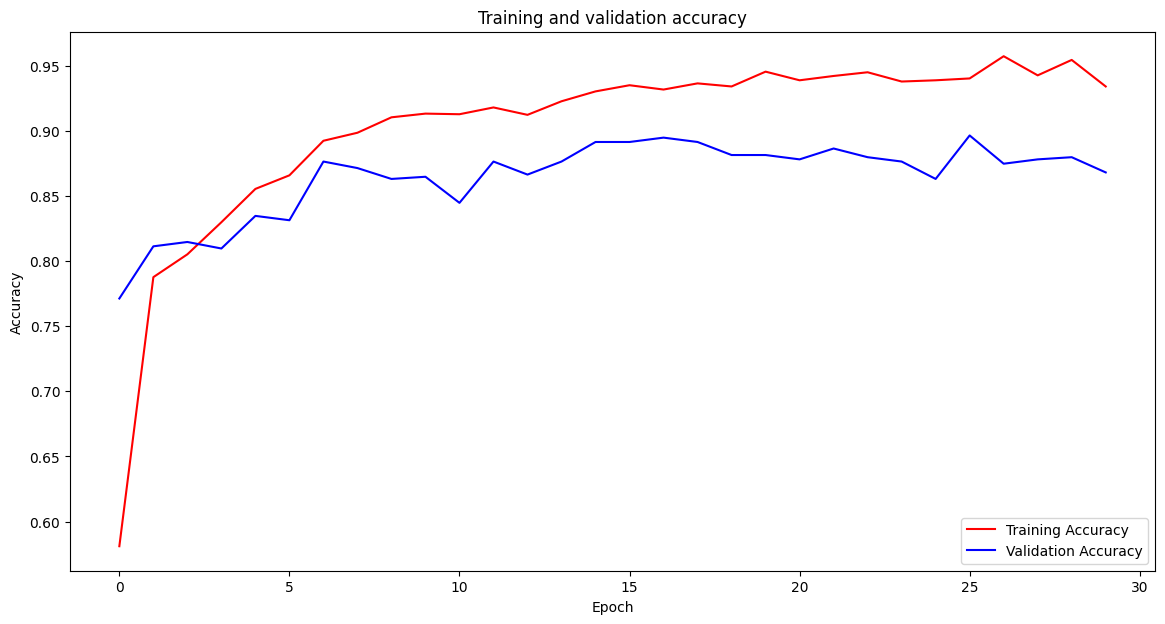

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc =inceptionv3_history.history['accuracy']
val_acc =inceptionv3_history.history['val_accuracy']
loss =inceptionv3_history.history['loss']
val_loss =inceptionv3_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

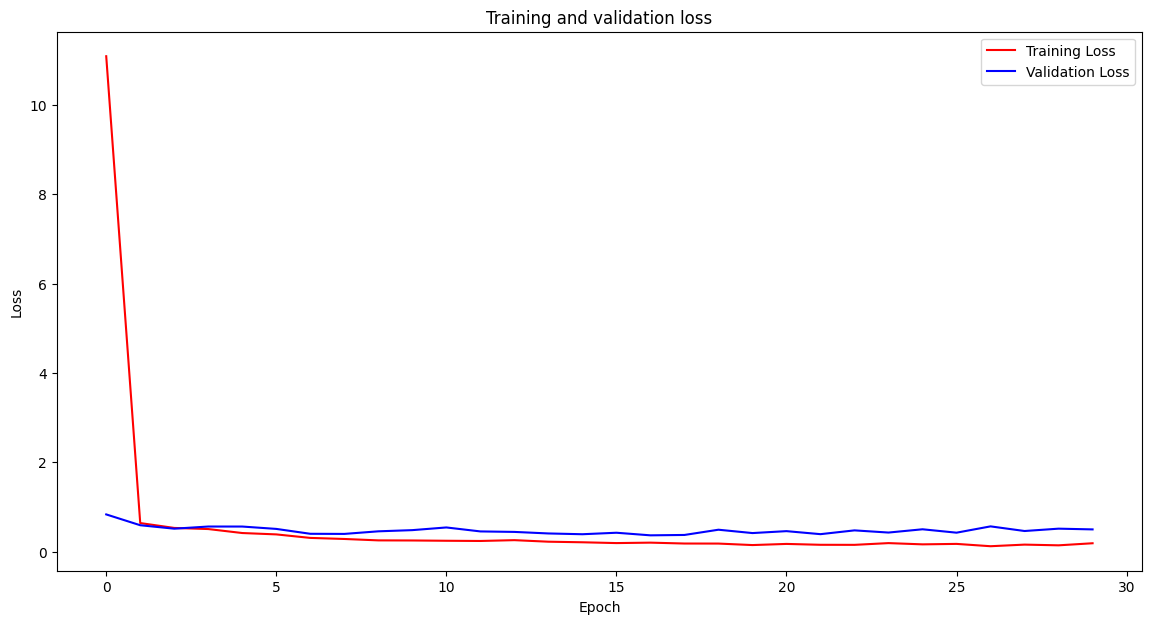

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# InceptionV3 Fine Tuning
Similar to VGG16, we are going to unfreeze some training layer.

In [ ]:
keras.backend.clear_session()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

InceptionV3_model = InceptionV3(input_shape=(img_height,img_width,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
   layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
   layer.trainable = True



In [ ]:
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)

InceptionV3_x = Dense(6, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = 30, validation_data = validation_generator, verbose=1)

Epoch 1/30
71/71 [==============================] - 53s 593ms/step - loss: 7.8106 - accuracy: 0.5246 - val_loss: 4.4928 - val_accuracy: 0.5376
Epoch 2/30
71/71 [==============================] - 42s 593ms/step - loss: 0.6011 - accuracy: 0.7744 - val_loss: 0.5772 - val_accuracy: 0.8230
Epoch 3/30
71/71 [==============================] - 42s 594ms/step - loss: 0.4345 - accuracy: 0.8521 - val_loss: 0.5510 - val_accuracy: 0.8047
Epoch 4/30
71/71 [==============================] - 42s 597ms/step - loss: 0.3347 - accuracy: 0.8796 - val_loss: 0.4335 - val_accuracy: 0.8648
Epoch 5/30
71/71 [==============================] - 42s 598ms/step - loss: 0.2593 - accuracy: 0.9123 - val_loss: 0.3018 - val_accuracy: 0.8965
Epoch 6/30
71/71 [==============================] - 42s 595ms/step - loss: 0.2534 - accuracy: 0.9104 - val_loss: 0.4479 - val_accuracy: 0.8614
Epoch 7/30
71/71 [==============================] - 42s 595ms/step - loss: 0.1801 - accuracy: 0.9436 - val_loss: 0.3019 - val_accuracy: 0.9048

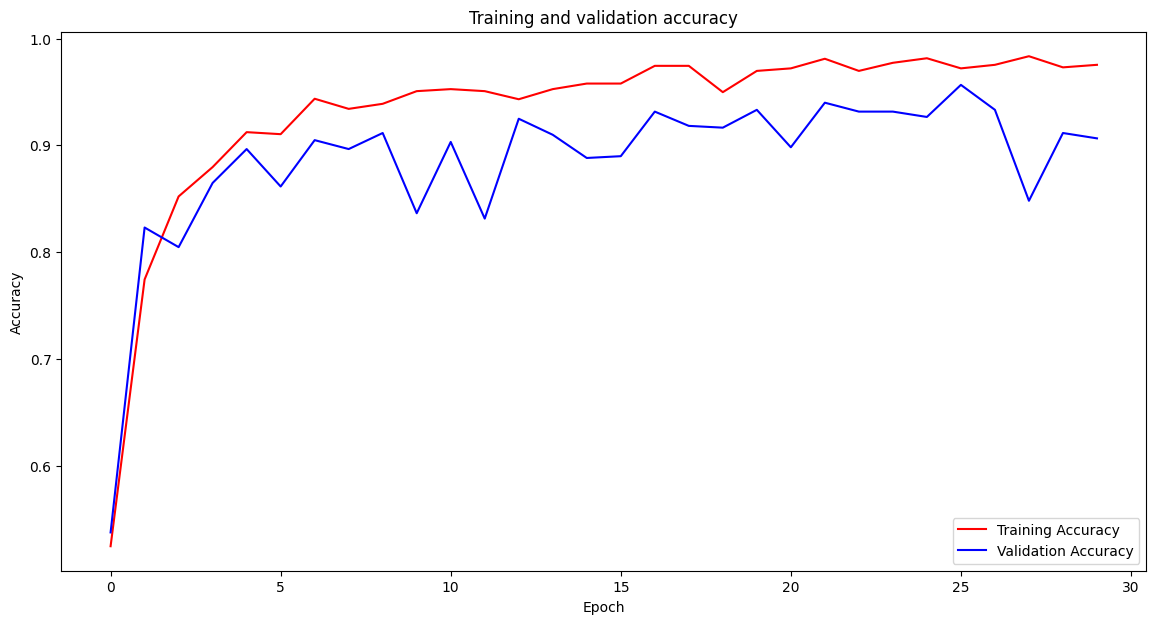

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc =inceptionv3_history.history['accuracy']
val_acc =inceptionv3_history.history['val_accuracy']
loss =inceptionv3_history.history['loss']
val_loss =inceptionv3_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

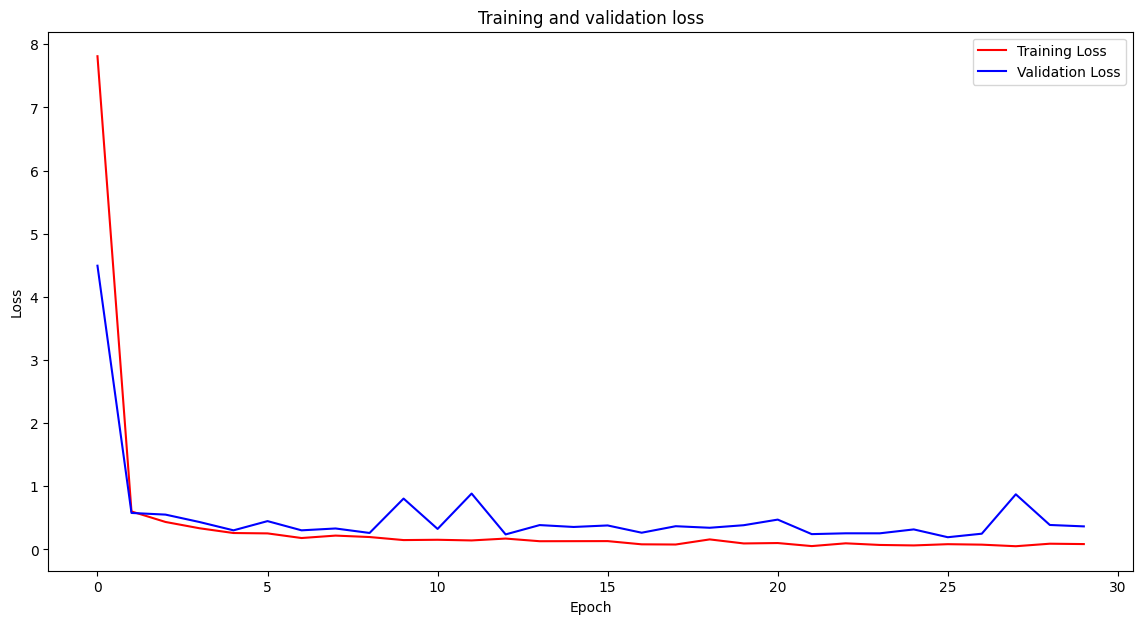

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# InceptionV3 Regularization
In this section, we are also using dropout and early stopping to monitor the model from overfitting threat.

In [ ]:
keras.backend.clear_session()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

InceptionV3_model = InceptionV3(input_shape=(img_height,img_width,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
   layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
   layer.trainable = True

In [ ]:
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = Dropout(0.5)(InceptionV3_x)
InceptionV3_x = Dense(6, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
inception_filepath = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/inceptionV3_optimized.h5'
inception_checkpoint = tf.keras.callbacks.ModelCheckpoint(inception_filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


In [ ]:
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = 30, validation_data = validation_generator,callbacks=[inception_checkpoint,inception_early_stopping],verbose=1)


Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 5.7978 - accuracy: 0.5602

71/71 [==============================] - 56s 627ms/step - loss: 5.7978 - accuracy: 0.5602 - val_loss: 1.8664 - val_accuracy: 0.6678
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.7493

71/71 [==============================] - 42s 592ms/step - loss: 0.6728 - accuracy: 0.7493 - val_loss: 0.5152 - val_accuracy: 0.8331
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 0.4848 - accuracy: 0.8346

71/71 [==============================] - 43s 601ms/step - loss: 0.4848 - accuracy: 0.8346 - val_loss: 0.4563 - val_accuracy: 0.8497
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.8493

71/71 [==============================] - 42s 598ms/step - loss: 0.4568 - accuracy: 0.8493 - val_loss: 0.3104 - val_accuracy: 0.8932
Epoch 5/30
71/71 [==============================] - ETA: 0s - loss: 0.2938 - accuracy: 0.8943

71/71 [==============================] - 43s 596ms/step - loss: 0.2938 - accuracy: 0.8943 - val_loss: 0.4813 - val_accuracy: 0.8715
Epoch 6/30
71/71 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.8981

71/71 [==============================] - 105s 1s/step - loss: 0.3397 - accuracy: 0.8981 - val_loss: 0.3009 - val_accuracy: 0.9149
Epoch 7/30
71/71 [==============================] - ETA: 0s - loss: 0.2469 - accuracy: 0.9185

71/71 [==============================] - 42s 595ms/step - loss: 0.2469 - accuracy: 0.9185 - val_loss: 0.4043 - val_accuracy: 0.8815
Epoch 8/30
71/71 [==============================] - ETA: 0s - loss: 0.1981 - accuracy: 0.9412

71/71 [==============================] - 42s 597ms/step - loss: 0.1981 - accuracy: 0.9412 - val_loss: 0.3389 - val_accuracy: 0.9032
Epoch 9/30
71/71 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.9185

71/71 [==============================] - 43s 604ms/step - loss: 0.2404 - accuracy: 0.9185 - val_loss: 0.5243 - val_accuracy: 0.8648
Epoch 10/30
71/71 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9384

71/71 [==============================] - 43s 600ms/step - loss: 0.2015 - accuracy: 0.9384 - val_loss: 0.3424 - val_accuracy: 0.9215
Epoch 11/30
71/71 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9417

71/71 [==============================] - 45s 634ms/step - loss: 0.1718 - accuracy: 0.9417 - val_loss: 0.2934 - val_accuracy: 0.9149
Epoch 12/30
71/71 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9498

71/71 [==============================] - 42s 592ms/step - loss: 0.1554 - accuracy: 0.9498 - val_loss: 0.3211 - val_accuracy: 0.9082
Epoch 13/30
71/71 [==============================] - ETA: 0s - loss: 0.1764 - accuracy: 0.9479

71/71 [==============================] - 42s 598ms/step - loss: 0.1764 - accuracy: 0.9479 - val_loss: 0.2555 - val_accuracy: 0.9332
Epoch 14/30
71/71 [==============================] - ETA: 0s - loss: 0.1189 - accuracy: 0.9597

71/71 [==============================] - 42s 597ms/step - loss: 0.1189 - accuracy: 0.9597 - val_loss: 0.3688 - val_accuracy: 0.9165
Epoch 15/30
71/71 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9507

71/71 [==============================] - 43s 602ms/step - loss: 0.1708 - accuracy: 0.9507 - val_loss: 0.2429 - val_accuracy: 0.9282
Epoch 16/30
71/71 [==============================] - ETA: 0s - loss: 0.1302 - accuracy: 0.9588

71/71 [==============================] - 43s 603ms/step - loss: 0.1302 - accuracy: 0.9588 - val_loss: 0.5212 - val_accuracy: 0.8881
Epoch 17/30
71/71 [==============================] - ETA: 0s - loss: 0.1389 - accuracy: 0.9559

71/71 [==============================] - 42s 598ms/step - loss: 0.1389 - accuracy: 0.9559 - val_loss: 0.2337 - val_accuracy: 0.9332
Epoch 18/30
71/71 [==============================] - ETA: 0s - loss: 0.1145 - accuracy: 0.9697

71/71 [==============================] - 42s 595ms/step - loss: 0.1145 - accuracy: 0.9697 - val_loss: 0.2100 - val_accuracy: 0.9382
Epoch 19/30
71/71 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9744

71/71 [==============================] - 43s 599ms/step - loss: 0.0787 - accuracy: 0.9744 - val_loss: 0.2582 - val_accuracy: 0.9349
Epoch 20/30
71/71 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9635

71/71 [==============================] - 43s 611ms/step - loss: 0.1018 - accuracy: 0.9635 - val_loss: 0.3356 - val_accuracy: 0.9149
Epoch 21/30
71/71 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 0.9569

71/71 [==============================] - 42s 592ms/step - loss: 0.1200 - accuracy: 0.9569 - val_loss: 0.5108 - val_accuracy: 0.8948
Epoch 22/30
71/71 [==============================] - ETA: 0s - loss: 0.1481 - accuracy: 0.9545

71/71 [==============================] - 42s 580ms/step - loss: 0.1481 - accuracy: 0.9545 - val_loss: 0.3081 - val_accuracy: 0.9115
Epoch 23/30
71/71 [==============================] - ETA: 0s - loss: 0.0872 - accuracy: 0.9701

71/71 [==============================] - 43s 595ms/step - loss: 0.0872 - accuracy: 0.9701 - val_loss: 0.4338 - val_accuracy: 0.8965
Epoch 24/30
71/71 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.9521

71/71 [==============================] - 43s 606ms/step - loss: 0.1496 - accuracy: 0.9521 - val_loss: 0.3460 - val_accuracy: 0.9232


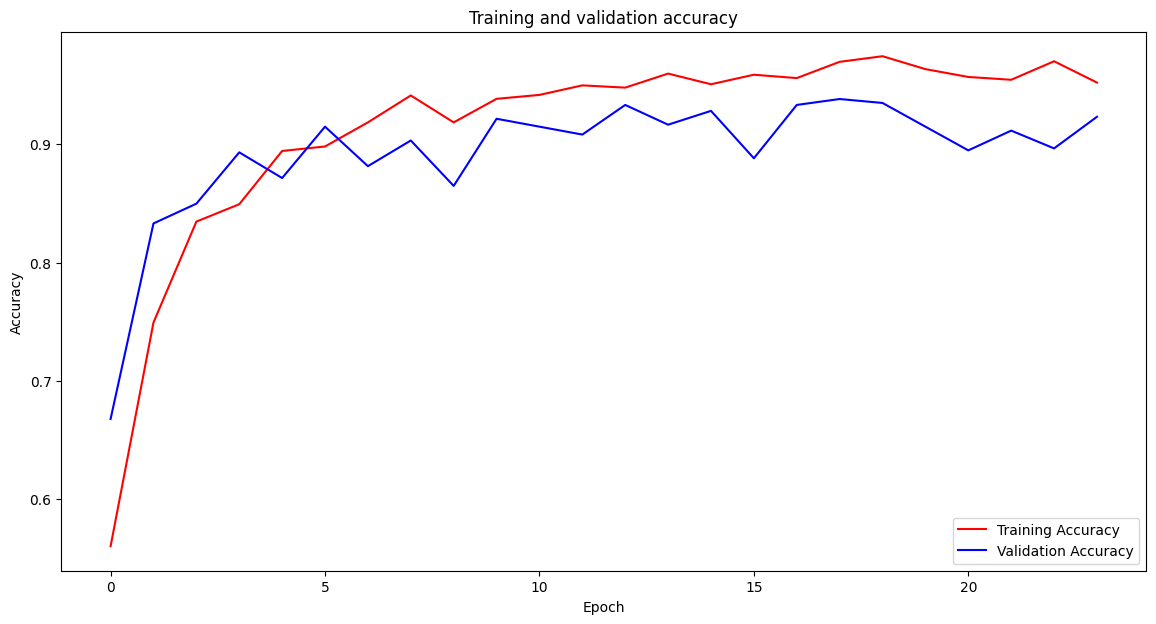

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

acc =inceptionv3_history.history['accuracy']
val_acc =inceptionv3_history.history['val_accuracy']
loss =inceptionv3_history.history['loss']
val_loss =inceptionv3_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

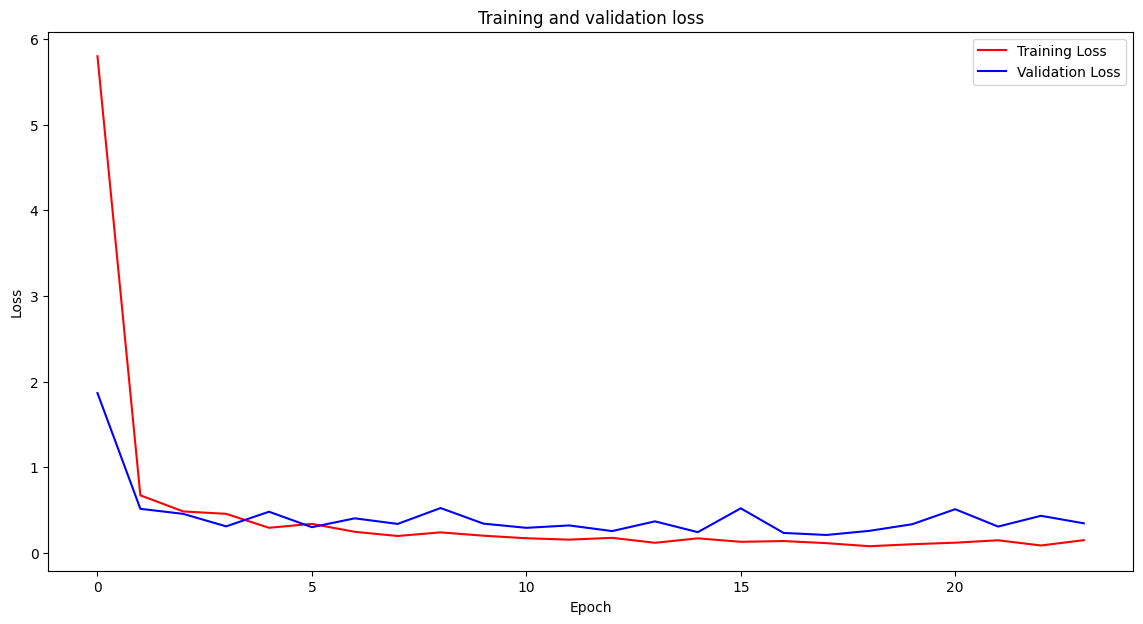

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
InceptionV3_x_final_model.save('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/inceptionV3_optimized.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Performance Testing

# Baseline Model
We are going to test the model using the images in testing set. We are going to evaluate through accurayc, precision and recall. We will also analyse on the confusion matrix.

In [ ]:
print("Train/Validation indicies: ", validation_generator.class_indices)

Train/Validation indicies:  {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
own_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/CNN_optimized.h5')

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TESTING/'
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/class_labels.csv')

# put them in a list
test_dfToList = test_df['id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = own_model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

100/100 [==============================] - 8s 3ms/step
[0 3 3 0 3 3 3 3 3 4 3 2 2 2 1 1 2 4 1 3 3 3 2 2 3 3 2 3 0 0 0 0 2 0 5 1 2
 0 2 0 2 3 2 2 3 3 2 2 3 4 4 4 3 0 4 1 1 3 2 3 3 3 3 0 1 3 3 3 2 2 3 3 2 3
 3 3 3 3 4 2 3 3 3 2 0 2 0 3 0 0 4 3 4 3 2 2 2 2 0 0]


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/class_labels.csv')
y_true = test_df['Labels']
y_pred = array

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[ 9,  0,  4,  2,  0,  1],
       [ 0,  1,  3, 10,  2,  0],
       [ 0,  2,  7,  7,  0,  0],
       [ 4,  1,  1, 13,  1,  0],
       [ 2,  2,  1,  5,  6,  0],
       [ 2,  1, 10,  3,  0,  0]])

In [ ]:
classes = ['cupboard','glass','metal','paper','plastic','trash']

In [ ]:
import itertools
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

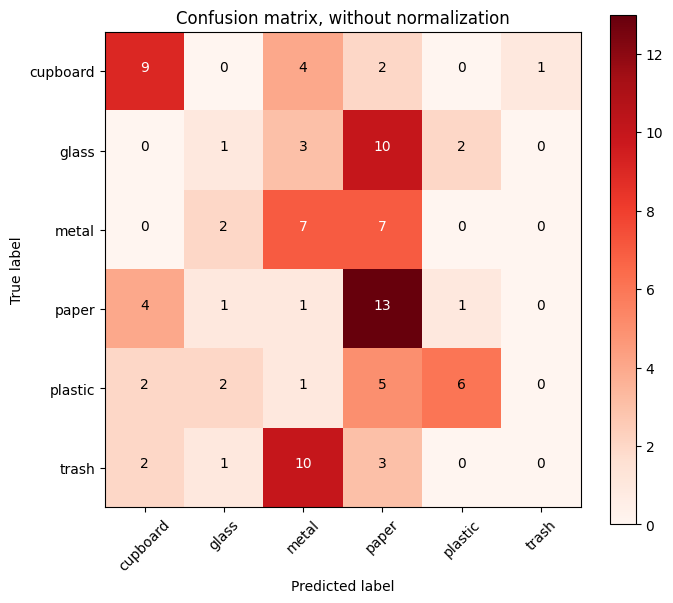

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
import sklearn.metrics as metrics
class_labels = list(validation_generator.class_indices.keys())
report = metrics.classification_report(y_true, answer, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.53      0.56      0.55        16
       glass       0.14      0.06      0.09        16
       metal       0.27      0.44      0.33        16
       paper       0.33      0.65      0.43        20
     plastic       0.67      0.38      0.48        16
       trash       0.00      0.00      0.00        16

    accuracy                           0.36       100
   macro avg       0.32      0.35      0.31       100
weighted avg       0.32      0.36      0.32       100



# VGG16 model

In [ ]:
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/VGG16_optimized.h5')

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a



In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/TESTING/'
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/class_labels.csv')

# put them in a list
test_dfToList = test_df['id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
print(test_df)

    Labels       id
0        3    1.png
1        3    2.png
2        3    3.png
3        3    4.png
4        3    5.png
..     ...      ...
95       5   96.png
96       5   97.png
97       4   98.png
98       4   99.png
99       3  100.png

[100 rows x 2 columns]


In [ ]:
array = vgg_model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

100/100 [==============================] - 2s 9ms/step
[0 4 3 3 0 3 3 3 3 0 4 2 2 2 2 4 2 4 1 1 1 1 1 1 3 2 0 3 3 3 0 3 0 0 0 4 5
 3 2 0 3 4 5 2 5 3 5 2 4 4 3 4 2 2 4 3 4 2 3 3 3 3 3 3 0 0 4 3 2 2 2 2 2 1
 1 3 1 1 1 1 3 2 3 2 0 0 3 0 0 0 4 4 4 3 5 4 2 4 3 3]


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/class_labels.csv')
y_true = test_df['Labels']
y_pred = array
print(y_true)

0     3
1     3
2     3
3     3
4     3
     ..
95    5
96    5
97    4
98    4
99    3
Name: Labels, Length: 100, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
print(loss)

1.2352514800679313


In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[10,  0,  1,  5,  0,  0],
       [ 0, 10,  2,  3,  1,  0],
       [ 0,  2, 10,  2,  2,  0],
       [ 5,  0,  0, 13,  2,  0],
       [ 0,  0,  3,  4,  9,  0],
       [ 1,  0,  4,  3,  3,  5]])

In [ ]:
classes = ['cupboard','glass','metal','paper','plastic','trash']

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

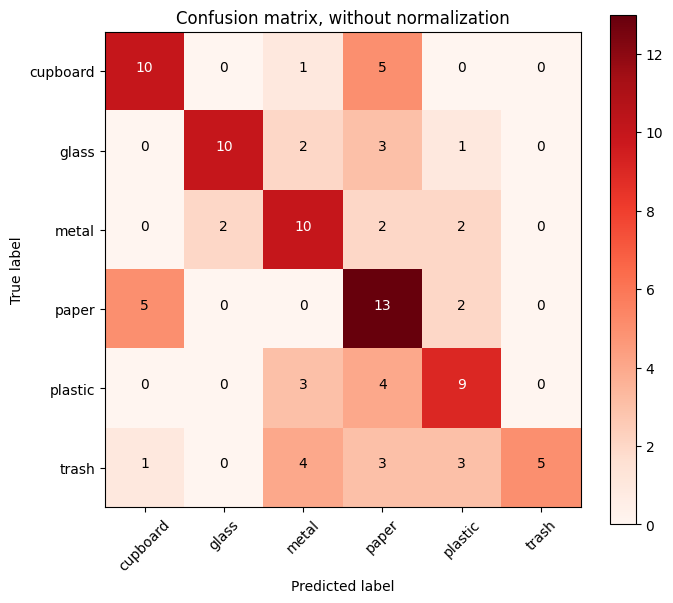

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()



In [ ]:
import sklearn.metrics as metrics
class_labels = list(validation_generator.class_indices.keys())
report = metrics.classification_report(y_true, answer, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.62      0.62      0.62        16
       glass       0.83      0.62      0.71        16
       metal       0.50      0.62      0.56        16
       paper       0.43      0.65      0.52        20
     plastic       0.53      0.56      0.55        16
       trash       1.00      0.31      0.48        16

    accuracy                           0.57       100
   macro avg       0.65      0.57      0.57       100
weighted avg       0.64      0.57      0.57       100



# Inception V3 Model

In [ ]:
inception_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Saved Model/inceptionV3_optimized.h5')

In [ ]:
array = inception_model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

100/100 [==============================] - 4s 13ms/step
[3 3 3 0 3 3 3 3 3 0 4 2 2 2 2 1 1 4 1 1 4 1 1 1 4 1 0 0 0 0 0 0 0 0 0 4 0
 0 2 0 3 3 5 4 4 3 2 4 4 4 4 4 4 4 4 5 5 4 3 3 3 3 3 3 3 3 3 2 2 2 2 1 2 2
 1 3 1 1 1 4 1 1 1 3 0 3 0 3 0 0 4 4 4 4 4 5 5 4 4 3]


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL Jul 2023/Assignment/Split_Dataset/class_labels.csv')
y_true = test_df['Labels']
y_pred = array
print(y_true)

0     3
1     3
2     3
3     3
4     3
     ..
95    5
96    5
97    4
98    4
99    3
Name: Labels, Length: 100, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
print(loss)

1.055625477072934


In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[13,  0,  0,  3,  0,  0],
       [ 0, 12,  0,  0,  4,  0],
       [ 0,  4, 10,  1,  1,  0],
       [ 2,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0, 14,  2],
       [ 3,  0,  2,  3,  5,  3]])

In [ ]:

classes = ['cupboard','glass','metal','paper','plastic','trash']
print(classes)

['cupboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

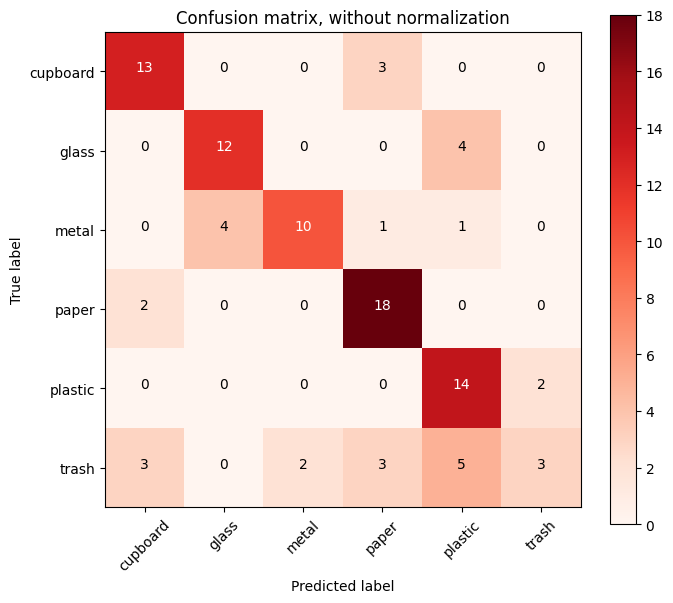

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
import sklearn.metrics as metrics
class_labels = list(train_generator.class_indices.keys())
report = metrics.classification_report(y_true, answer, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.72      0.81      0.76        16
       glass       0.75      0.75      0.75        16
       metal       0.83      0.62      0.71        16
       paper       0.72      0.90      0.80        20
     plastic       0.58      0.88      0.70        16
       trash       0.60      0.19      0.29        16

    accuracy                           0.70       100
   macro avg       0.70      0.69      0.67       100
weighted avg       0.70      0.70      0.67       100

